# Zomato data Analysis 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
#loading the data frame
df= pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [188]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data Processing

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [193]:
# every column has non - null values which means it does not contain any duplicated values 

In [195]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Data Cleaning


In [198]:
# for our convinence we will try to remove the /5 factor from the rate column

In [200]:
def updatedrate(value):
    value = str(value).split('/')   #split helps to split the string by the delemeter to substring s list 
    value = value[0];   #returnig the first index as we needed the first part ex4.1 
    return float(value)
df['rate'] = df['rate'].apply(updatedrate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [202]:
#checking missing values or duplicate values

In [204]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

In [206]:
df.duplicated().sum()

0

In [208]:
# this means we dont have any duplicated values 

# Analysis

# What type of resturant majority of customer order from


 most order comes from dinning then second from cafes and third from Buffet

Text(0.5, 0, 'Type of Resturant')

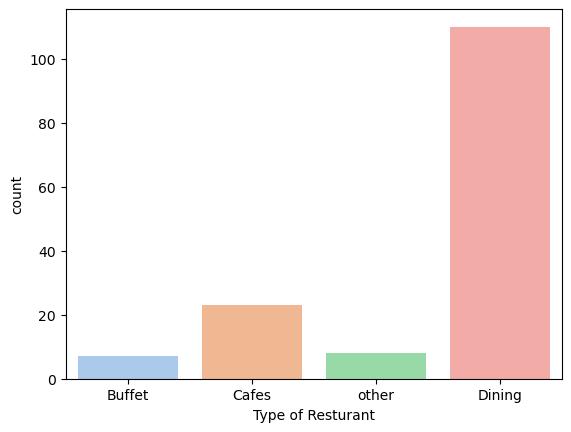

In [212]:
sns.countplot(x=df['listed_in(type)'],hue=df['listed_in(type)'],palette='pastel')
plt.xlabel('Type of Resturant')


In [241]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [243]:
# for counting the total votes we need to apply sum in the votes columns and voting for each restro type we have to find then for this we need to 
#firstly group the restro type then calculate the total votes for each tyoe


In [245]:
groupdata=df.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': groupdata}) # creating a new df named result having key vakue pair
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


# now we can show the how many votes for each restro type recieved from customer

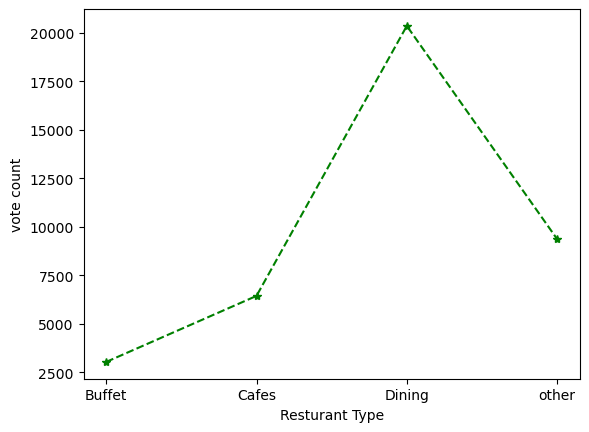

In [248]:
plt.plot(result,color='green',marker='*', linestyle='--')
plt.xlabel('Resturant Type')
plt.ylabel('vote count')
plt.show()

In [249]:
#now we need to see the distributuin of rating for resturant 

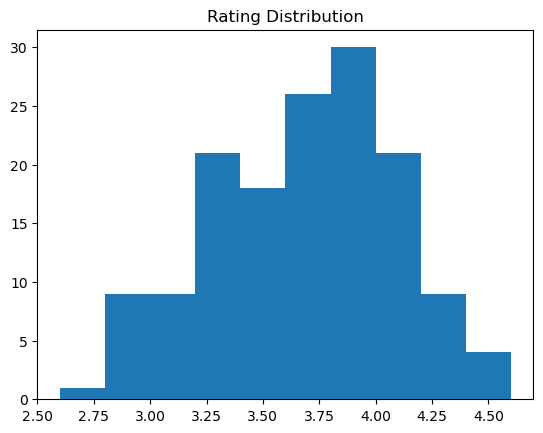

In [250]:
plt.hist(x=df['rate'],bins=10)
plt.title('Rating Distribution')
plt.show()

In [251]:
 # majority ratings are between morethan 3.5 and less than 4.1

# now lets analyse the average spending of order if ordered online


In [284]:
online_orders = df[df["online_order"] == "Yes"]
average_spending_online = online_orders["approx_cost(for two people)"].mean()
print('Average money spend by couple if order online is',average_spending_online)

Average money spend by couple if order online is 510.3448275862069


In [286]:
offline_orders = df[df["online_order"] == "No"]
average_spending_offline = online_orders["approx_cost(for two people)"].mean()
print('Average money spend by couple if order ofline is',average_spending_offline)

Average money spend by couple if order ofline is 510.3448275862069


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

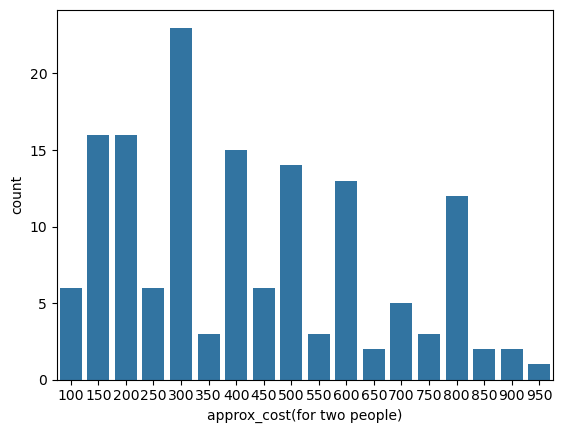

In [296]:
sns.countplot(x=df['approx_cost(for two people)'])

In [298]:
#count of 300 rupees is most for orders both online and order order considerred

# Rating as comparted to online vs offline

In [306]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\KIIT\AppData\Local\Temp\ipykernel_13236\4130098408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['online_order'],y=df['rate'],palette='Set2')


<Axes: xlabel='online_order', ylabel='rate'>

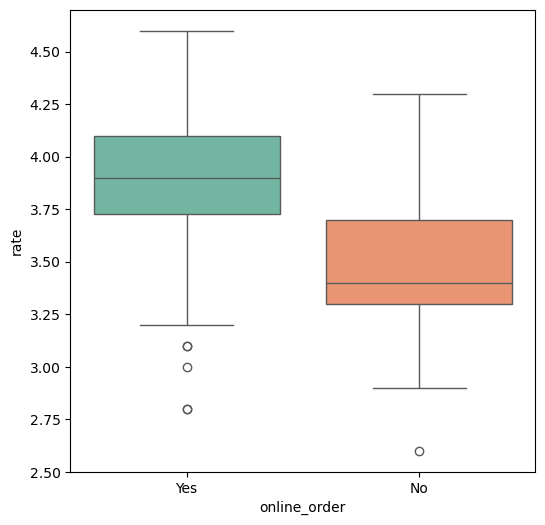

In [318]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'],y=df['rate'],palette='Set2')

In [312]:
#online order has more rating which lies betwen 3.75 to 4

In [320]:
#offline order has less raring as compareto online ---- avg rating for offline becomes less than 3.50


# now wwe will analysie  type of restaurant received more offline orders vs online order

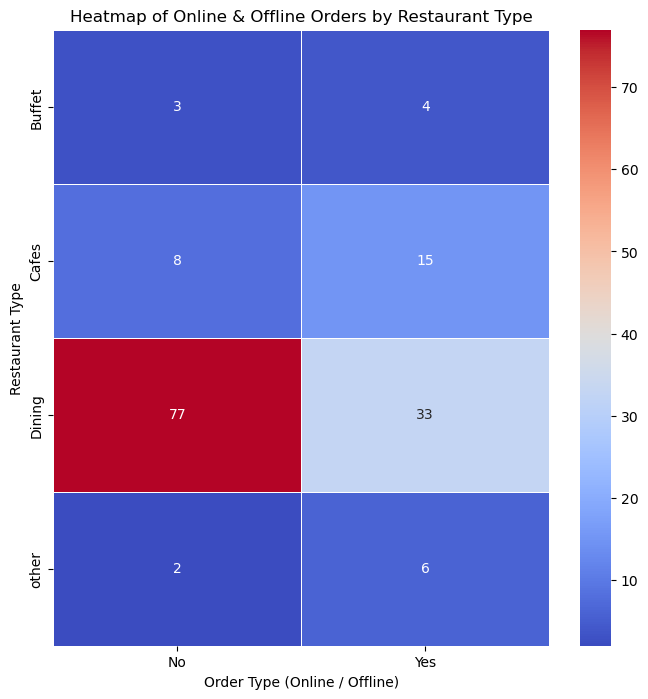

In [333]:
# Creating a pivot table for both Online and Offline orders
combined_pivot = df.pivot_table(
    index='listed_in(type)', 
    columns='online_order', 
    values='approx_cost(for two people)', 
    aggfunc='count'
)

# Plotting the combined heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(combined_pivot, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap of Online & Offline Orders by Restaurant Type')
plt.xlabel('Order Type (Online / Offline)')
plt.ylabel('Restaurant Type')
plt.show()
